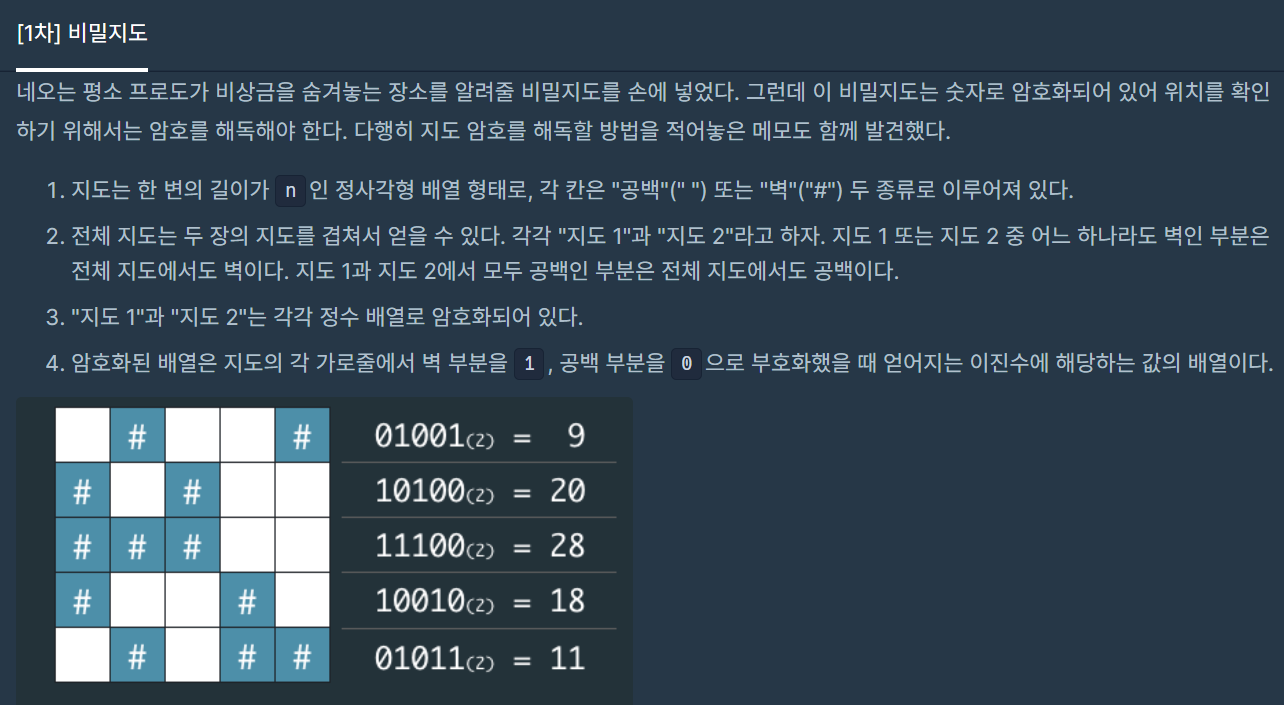

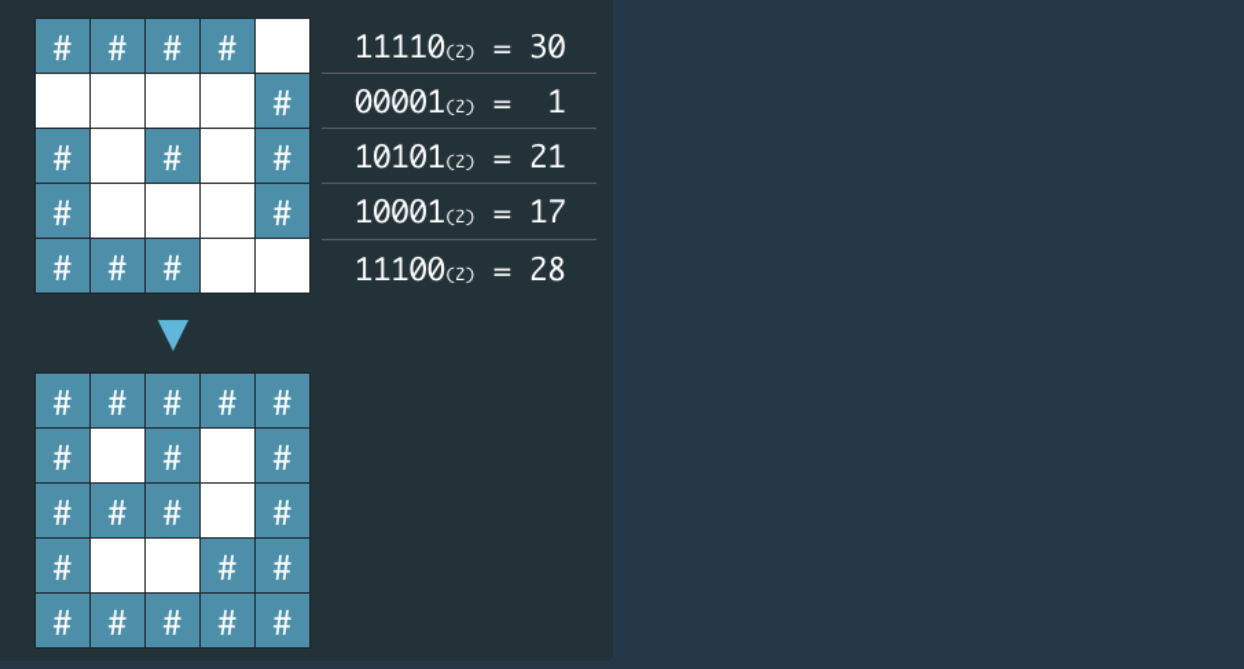

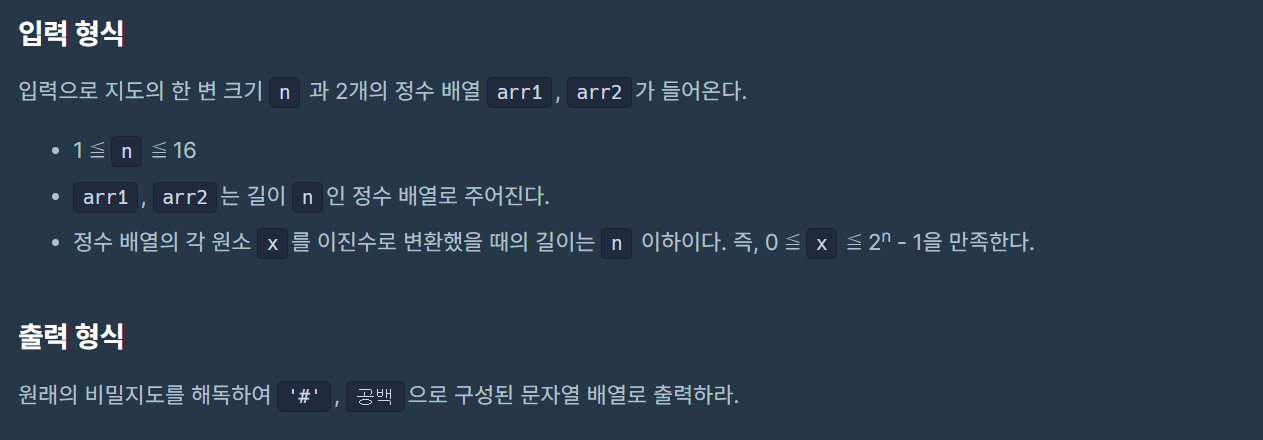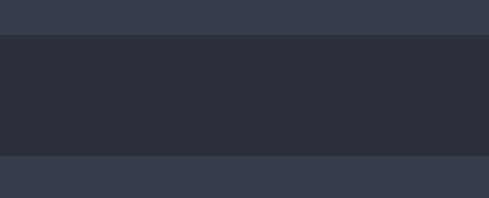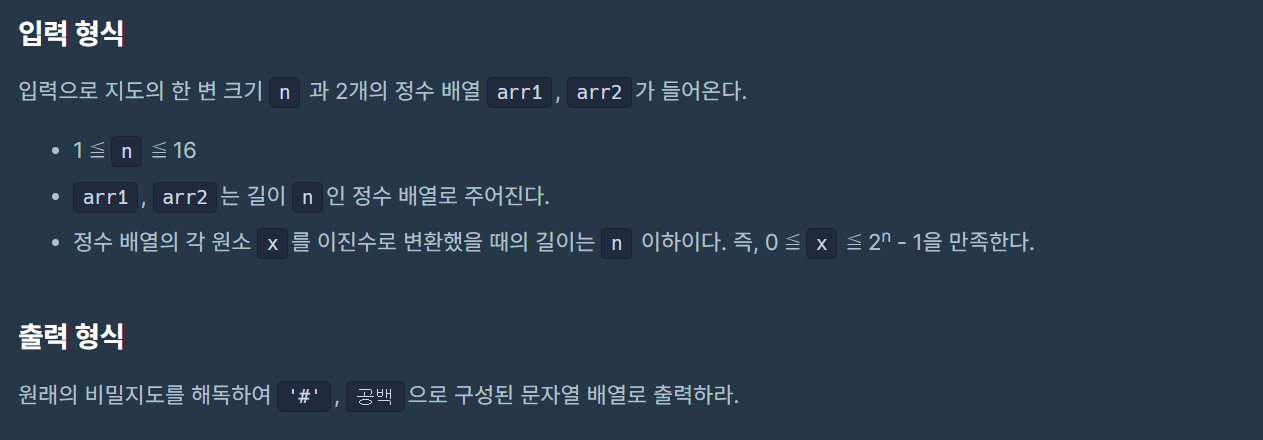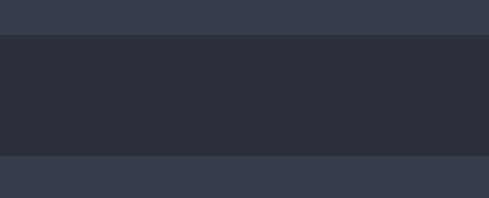

# 입력값 n을 입력받아 n x n 정사각형 배열을 만들자

In [1]:
n = 5

t_map = []
for i in range(n+1):
    t = [None]*n
    t_map.append(t)
    
t_map

[[None, None, None, None, None],
 [None, None, None, None, None],
 [None, None, None, None, None],
 [None, None, None, None, None],
 [None, None, None, None, None],
 [None, None, None, None, None]]

# 들어온 array 값을 2진법으로 바꾸는 코드

In [8]:
arr1 = [30, 1, 21, 17, 28]
binarys = [ bin(i)[0]+bin(i)[2:] for i in arr1 ]

binarys

['011110', '01', '010101', '010001', '011100']

# 2진법에 따라 0의 수에는 공백 / 1의 수에는 #을 return!

In [9]:
import re

cnt = 0
for binary in binarys:
    binarys[cnt] = re.sub('0', ' ', binary)
    binarys[cnt] = re.sub('1', '#', binarys[cnt])
    cnt+=1

binarys

[' #### ', ' #', ' # # #', ' #   #', ' ###  ']

# n과 arr1, arr2를 입력받아 한개의 지도를 출력하자!

In [22]:
arr1 = [9, 20, 28, 18, 11]
arr2 = [30, 1, 21, 17, 28]

binarys_1 = [ bin(i)[2:] for i in arr1 ]
binarys_2 = [ bin(i)[2:] for i in arr2 ]

def make_map(binarys):
    cnt = 0
    for binary in binarys:
        binarys[cnt] = re.sub('0', ' ', binary)
        binarys[cnt] = re.sub('1', '#', binarys[cnt])
        cnt+=1
        
    return binarys

print(make_map(binarys_1))
print(make_map(binarys_2))

['#  #', '# #  ', '###  ', '#  # ', '# ##']
['#### ', '#', '# # #', '#   #', '###  ']


In [24]:
bin(1)

'0b1'

# 오류를 파악했다. 1을 2진법으로 반환하면 1로만 나오는데 이를 00001로 바꿔여 한다.
진법의 수가 n자리를 충족하지 못한다면 그 자리에 0을 채워 넣어야 한다.

In [54]:
n = 5
arr2 = [30, 1, 21, 17, 28]
binarys = [ bin(i)[2:] for i in arr2 ]

cnt = 0
for i in binarys:
    if len(i) < n:
        print(i)
        while len(i) < n:
            i = '0'+str(i)
        binarys[cnt] = i
    cnt += 1
            
binarys

1


['11110', '00001', '10101', '10001', '11100']

# 오류를 고친 코드를 다시 함수화!

In [57]:
arr1 = [9, 20, 28, 18, 11]
arr2 = [30, 1, 21, 17, 28]

binarys_1 = [ bin(i)[2:] for i in arr1 ]
binarys_2 = [ bin(i)[2:] for i in arr2 ]

def fill_0(binarys):
    cnt = 0
    for binary in binarys:
        if len(binary) < n:
            while len(binary) < n:
                binary = '0'+str(binary)
            binarys[cnt] = binary
        cnt += 1
        
    return binarys

binarys_1 = fill_0(binarys_1)
binarys_2 = fill_0(binarys_2)

def make_map(binarys):
    import re
    cnt = 0
    for binary in binarys:
        binarys[cnt] = re.sub('0', ' ', binary)
        binarys[cnt] = re.sub('1', '#', binarys[cnt])
        cnt+=1
        
    return binarys

print(make_map(binarys_1))
print(make_map(binarys_2))

[' #  #', '# #  ', '###  ', '#  # ', ' # ##']
['#### ', '    #', '# # #', '#   #', '###  ']


# 조건문을 이용하여 #이 하나 이상 나오면 # 없으면 ' ' 이 나오게 함

In [91]:
arr1 = [9, 20, 28, 18, 11]
arr2 = [30, 1, 21, 17, 28]

answer = [''] * n

binarys_1 = [ bin(i)[2:] for i in arr1 ]
binarys_2 = [ bin(i)[2:] for i in arr2 ]

def fill_0(binarys):
    cnt = 0
    for binary in binarys:
        if len(binary) < n:
            while len(binary) < n:
                binary = '0'+str(binary)
            binarys[cnt] = binary
        cnt += 1
        
    return binarys

def make_map(binarys):
    import re
    cnt = 0
    
    for binary in binarys:
        binarys[cnt] = re.sub('0', ' ', binary)
        binarys[cnt] = re.sub('1', '#', binarys[cnt])
        cnt+=1
        
    return binarys

binarys_1 = fill_0(binarys_1)
binarys_2 = fill_0(binarys_2)

binarys_1 = make_map(binarys_1)
binarys_2 = make_map(binarys_2)

cnt = 0
for binarys_list1,binarys_list2 in zip(binarys_1, binarys_2):
    for i, z in zip(binarys_list1,binarys_list2):
#         print(i,z)
        if i == '#' or z == '#':
            answer[cnt] = answer[cnt]+'#'
        else:
            answer[cnt] = answer[cnt]+' '
    cnt += 1
    
answer

['#####', '# # #', '### #', '#  ##', '#####']

# 최종 코드

In [90]:
def solution(n, arr1, arr2):

    answer = [''] * n

    binarys_1 = [ bin(i)[2:] for i in arr1 ]
    binarys_2 = [ bin(i)[2:] for i in arr2 ]

    def fill_0(binarys):
        cnt = 0
        for binary in binarys:
            if len(binary) < n:
                while len(binary) < n:
                    binary = '0'+str(binary)
                binarys[cnt] = binary
            cnt += 1

        return binarys

    def make_map(binarys):
        import re
        cnt = 0

        for binary in binarys:
            binarys[cnt] = re.sub('0', ' ', binary)
            binarys[cnt] = re.sub('1', '#', binarys[cnt])
            cnt+=1

        return binarys

    binarys_1 = fill_0(binarys_1)
    binarys_2 = fill_0(binarys_2)

    binarys_1 = make_map(binarys_1)
    binarys_2 = make_map(binarys_2)

    cnt = 0
    for binarys_list1,binarys_list2 in zip(binarys_1, binarys_2):
        for i, z in zip(binarys_list1,binarys_list2):
            if i == '#' or z == '#':
                answer[cnt] = answer[cnt]+'#'
            else:
                answer[cnt] = answer[cnt]+' '
        cnt += 1

    return answer

['#####', '# # #', '### #', '#  ##', '#####']
